In [22]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt

In [2]:
# Download latest version of the Spotify Charts dataset
charts_path = kagglehub.dataset_download("dhruvildave/spotify-charts")

print("Path to dataset files:", charts_path)

100%|██████████| 945M/945M [00:34<00:00, 28.5MB/s] 

Extracting files...


Path to dataset files: /home/thehoul/.cache/kagglehub/datasets/dhruvildave/spotify-charts/versions/85


In [3]:
# Download latest version of the Spotify Tracks dataset
tracks_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", tracks_path)

100%|██████████| 8.17M/8.17M [00:01<00:00, 8.46MB/s]

Extracting files...


Path to dataset files: /home/thehoul/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1


In [4]:
import os
charts_csv_name = os.listdir(charts_path)[0]
track_csv_name = os.listdir(tracks_path)[0]
print(charts_csv_name, track_csv_name)

charts.csv dataset.csv


In [5]:
charts_pd = pd.read_csv(charts_path + "/" + charts_csv_name)

# Spotify Charts dataset

In [6]:
charts_pd.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [7]:
charts_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


In [8]:
print(f"Charts db has {charts_pd.url.nunique()} unique songs and {len(charts_pd)} entries")

Charts db has 217704 unique songs and 26173514 entries


In [9]:
# Group by track_id and display the first one
grouped = charts_pd.groupby("url")
grouped.get_group(list(grouped.groups.keys())[0])

,title,rank,date,artist,url,region,chart,trend,streams
25149677,Novinha de 15 (feat. Luan no Beat) - Brega Funk,23,2021-12-28,"É o Luiz, Mc Carlinhos",https://open.spotify.com/track/0006pNcm2SyVexl...,Brazil,viral50,NEW_ENTRY,NaN
25197062,Novinha de 15 (feat. Luan no Beat) - Brega Funk,20,2021-12-29,"É o Luiz, Mc Carlinhos",https://open.spotify.com/track/0006pNcm2SyVexl...,Brazil,viral50,MOVE_UP,NaN
25210215,Novinha de 15 (feat. Luan no Beat) - Brega Funk,21,2021-12-30,"É o Luiz, Mc Carlinhos",https://open.spotify.com/track/0006pNcm2SyVexl...,Brazil,viral50,MOVE_DOWN,NaN
25226502,Novinha de 15 (feat. Luan no Beat) - Brega Funk,24,2021-12-31,"É o Luiz, Mc Carlinhos",https://open.spotify.com/track/0006pNcm2SyVexl...,Brazil,viral50,MOVE_DOWN,NaN


We can see that a track appears mutliple times based on the evolution of its rank with a description of the change (see "trend" column indicating whether the song moved up or down the ranks)

# Spotify tracks dataset

In [10]:
tracks_pd = pd.read_csv(tracks_path + "/" + track_csv_name)

In [11]:
tracks_pd.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [12]:
print(f"Tracks db has {tracks_pd.track_id.nunique()} uniique songs and {len(tracks_pd)} entries")

Tracks db has 89741 uniique songs and 114000 entries


In [13]:
tracks_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [14]:
# Group by track_id and display one
grouped = tracks_pd.groupby("track_id")
grouped.get_group('5SuOikwiRyPMVoIQDJUgSV')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
62102,62102,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,j-pop
99152,99152,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,singer-songwriter
102151,102151,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,songwriter


A song appears as many times as it has genres

# Merging the datasets


We can see that the `track_id` column in the tracks corresponds to the last value in the `url` column of the charts. We can extract this id and try to merge the two databases.

In [15]:
# Extract the ID from the url column
charts_pd["track_id"] = charts_pd["url"].apply(lambda x: x.split("/")[-1])
print(charts_pd.track_id.nunique(), tracks_pd.track_id.nunique())

217704 89741


In [16]:
# Merge on the track_id
merged_pd = charts_pd.merge(tracks_pd, on="track_id")
merged_pd.head()

,title,rank,date,artist,url,region,chart,trend,streams,track_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0,6mICuAdrwEjh6Y6lroV2Kg,...,-2.921,0,0.0776,0.187,0.00003,0.159,0.907,102.034,4,latin
1,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0,3AEZUABDXNtecAOSC1qTfo,...,-3.073,0,0.0502,0.400,0.00000,0.176,0.710,93.974,4,reggae
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0,3AEZUABDXNtecAOSC1qTfo,...,-3.073,0,0.0502,0.400,0.00000,0.176,0.710,93.974,4,reggaeton
3,Rockabye (feat. Sean Paul & Anne-Marie),21,2017-01-01,Clean Bandit,https://open.spotify.com/track/5knuzwU65gJK7IF...,Argentina,top200,SAME_POSITION,76123.0,5knuzwU65gJK7IF5yJsuaW,...,-4.068,0,0.0523,0.406,0.00000,0.180,0.742,101.965,4,dance
4,Rockabye (feat. Sean Paul & Anne-Marie),21,2017-01-01,Clean Bandit,https://open.spotify.com/track/5knuzwU65gJK7IF...,Argentina,top200,SAME_POSITION,76123.0,5knuzwU65gJK7IF5yJsuaW,...,-4.068,0,0.0523,0.406,0.00000,0.180,0.742,101.965,4,edm


In [17]:
merged_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11293758 entries, 0 to 11293757
Data columns (total 30 columns):
 #   Column            Dtype  
---  ------            -----  
 0   title             object 
 1   rank              int64  
 2   date              object 
 3   artist            object 
 4   url               object 
 5   region            object 
 6   chart             object 
 7   trend             object 
 8   streams           float64
 9   track_id          object 
 10  Unnamed: 0        int64  
 11  artists           object 
 12  album_name        object 
 13  track_name        object 
 14  popularity        int64  
 15  duration_ms       int64  
 16  explicit          bool   
 17  danceability      float64
 18  energy            float64
 19  key               int64  
 20  loudness          float64
 21  mode              int64  
 22  speechiness       float64
 23  acousticness      float64
 24  instrumentalness  float64
 25  liveness          float64
 26  valence     

In [18]:
print(merged_pd.track_id.nunique(), len(merged_pd))

6894 11293758


The merged dataset contains 11'293'758 entries and 6894 unique songs.

In [19]:
# Group by track_id and check what changes
grouped_pd = merged_pd.groupby("track_id")
# Display the ith group
grouped_pd.get_group(list(grouped_pd.groups.keys())[0])

,title,rank,date,artist,url,region,chart,trend,streams,track_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6366458,Mr. Brightside,45,2021-07-01,The Killers,https://open.spotify.com/track/003vvx7Niy0yvhv...,Australia,top200,MOVE_UP,64098.0,003vvx7Niy0yvhvHt4a68B,...,-5.23,1,0.0747,0.00121,0.0,0.0995,0.236,148.033,4,alt-rock
6366459,Mr. Brightside,45,2021-07-01,The Killers,https://open.spotify.com/track/003vvx7Niy0yvhv...,Australia,top200,MOVE_UP,64098.0,003vvx7Niy0yvhvHt4a68B,...,-5.23,1,0.0747,0.00121,0.0,0.0995,0.236,148.033,4,alternative
6366460,Mr. Brightside,45,2021-07-01,The Killers,https://open.spotify.com/track/003vvx7Niy0yvhv...,Australia,top200,MOVE_UP,64098.0,003vvx7Niy0yvhvHt4a68B,...,-5.23,1,0.0747,0.00121,0.0,0.0995,0.236,148.033,4,rock
6366662,Mr. Brightside,163,2021-07-01,The Killers,https://open.spotify.com/track/003vvx7Niy0yvhv...,Austria,top200,MOVE_UP,5196.0,003vvx7Niy0yvhvHt4a68B,...,-5.23,1,0.0747,0.00121,0.0,0.0995,0.236,148.033,4,alt-rock
6366663,Mr. Brightside,163,2021-07-01,The Killers,https://open.spotify.com/track/003vvx7Niy0yvhv...,Austria,top200,MOVE_UP,5196.0,003vvx7Niy0yvhvHt4a68B,...,-5.23,1,0.0747,0.00121,0.0,0.0995,0.236,148.033,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10814691,Mr. Brightside,42,2021-10-31,The Killers,https://open.spotify.com/track/003vvx7Niy0yvhv...,United Kingdom,top200,MOVE_DOWN,110094.0,003vvx7Niy0yvhvHt4a68B,...,-5.23,1,0.0747,0.00121,0.0,0.0995,0.236,148.033,4,alternative
10814692,Mr. Brightside,42,2021-10-31,The Killers,https://open.spotify.com/track/003vvx7Niy0yvhv...,United Kingdom,top200,MOVE_DOWN,110094.0,003vvx7Niy0yvhvHt4a68B,...,-5.23,1,0.0747,0.00121,0.0,0.0995,0.236,148.033,4,rock
10815268,Mr. Brightside,89,2021-10-31,The Killers,https://open.spotify.com/track/003vvx7Niy0yvhv...,United States,top200,MOVE_DOWN,278003.0,003vvx7Niy0yvhvHt4a68B,...,-5.23,1,0.0747,0.00121,0.0,0.0995,0.236,148.033,4,alt-rock
10815269,Mr. Brightside,89,2021-10-31,The Killers,https://open.spotify.com/track/003vvx7Niy0yvhv...,United States,top200,MOVE_DOWN,278003.0,003vvx7Niy0yvhvHt4a68B,...,-5.23,1,0.0747,0.00121,0.0,0.0995,0.236,148.033,4,alternative


As song appears mutliple times because it of the region in which it is analysed from, the changes in its rank and the different genres that it has. We could consider merging the genres into a list to avoid to much duplication but we will keep it that way for now.

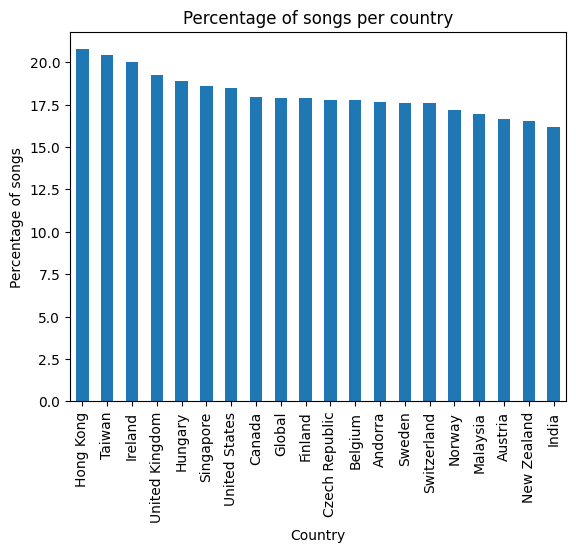

In [23]:
# Plot the number of songs per country
grouped_pd = merged_pd.groupby("region")
# Count the number of songs per country
songs_per_country = grouped_pd.track_id.nunique()
# Sort to keep the top 20
songs_per_country = songs_per_country.sort_values(ascending=False)[:20]
# Convert to percentage
songs_per_country = songs_per_country / merged_pd.track_id.nunique() * 100
# Plot the bar chart
songs_per_country.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Percentage of songs")
plt.title("Percentage of songs per country")
# Save the plott
plt.savefig("songs_per_country.png", bbox_inches='tight')

In [24]:
# Print the number of countries
print(f"There are {len(grouped_pd.groups)} countries in the dataset")

There are 70 countries in the dataset


In [25]:
# Count the number of NaNs in the region column
print(f"There are {merged_pd.region.isna().sum()} NaNs in the region column")

There are 0 NaNs in the region column


In [26]:
# Count the average amount of genre per song
grouped_pd = merged_pd.groupby("track_id")
# Count the number of genres per song
genres_per_song = grouped_pd.track_genre.nunique()
# Compute the average
print(f"The average number of genres per song is {genres_per_song.mean()}")

The average number of genres per song is 1.4453147664635915


In [27]:
# Count the different genres
genres = merged_pd.track_genre.unique()
print(f"There are {len(genres)} different genres in the dataset")

There are 110 different genres in the dataset


In [28]:
# Count the number of NaNs in the genre colummn
print(f"There are {merged_pd.track_genre.isna().sum()} NaNs in the genre column")

There are 0 NaNs in the genre column


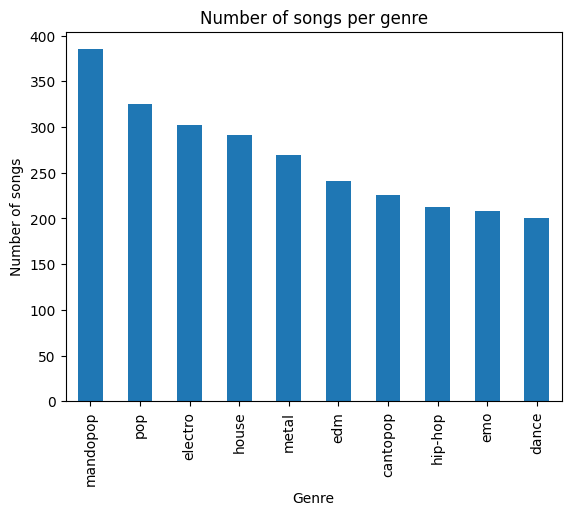

In [29]:
# Compute the amount of unique songs per genres
songs_per_genre = merged_pd.groupby("track_genre").track_id.nunique()
# Count the number of unique songs per genre
songs_per_genre = songs_per_genre.sort_values(ascending=False)
# Keep the 10 most important ones
songs_per_genre = songs_per_genre[:10]
# Plot the bar chart
songs_per_genre.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of songs")
plt.title("Number of songs per genre")
# Save the plot
plt.savefig("songs_per_genre.png", bbox_inches='tight')

In [30]:
# Print the highest and smallest rank
print(f"The highest rank is {merged_pd['rank'].max()} and the smallest is {merged_pd['rank'].min()}")

The highest rank is 200 and the smallest is 1


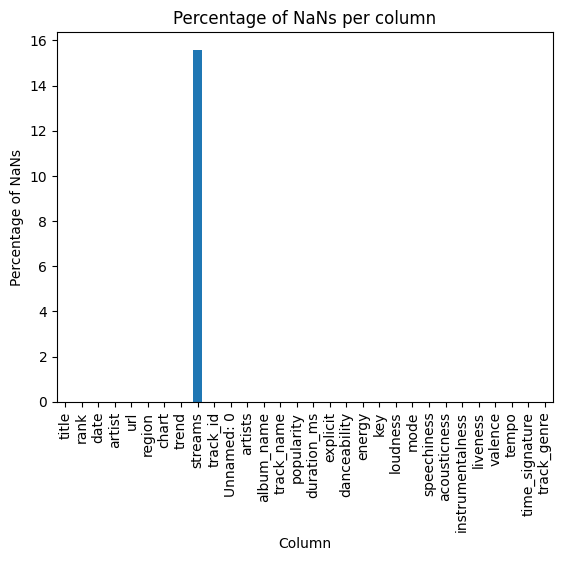

In [31]:
# Compute the percentage of NaNs per column
nans = merged_pd.isna().sum() / len(merged_pd) * 100
# Plot
nans.plot(kind="bar")
plt.xlabel("Column")
plt.ylabel("Percentage of NaNs")
plt.title("Percentage of NaNs per column")
# Save the plot
plt.savefig("nans_per_column.png", bbox_inches='tight')

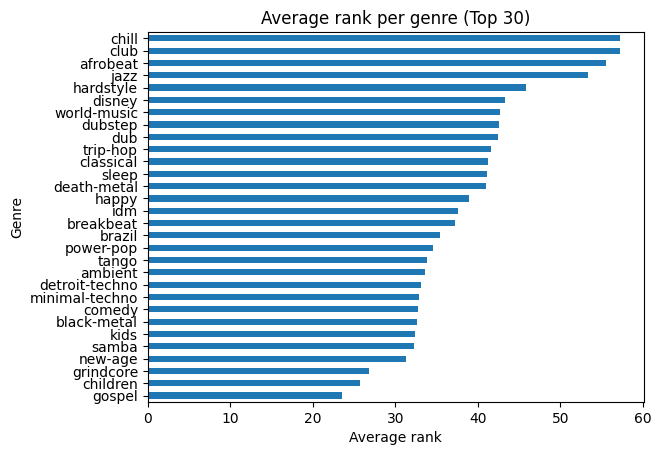

In [45]:
# Group by genre and compute the average rank
grouped_pd = merged_pd.groupby("track_genre")
# Compute the average rank per genre
avg_rank_per_genre = grouped_pd['rank'].mean()
# Sort the values
avg_rank_per_genre = avg_rank_per_genre.sort_values(ascending=True)
# Plot the bar chart
avg_rank_per_genre[:30].plot(kind="barh")
plt.xlabel("Average rank")
plt.ylabel("Genre")
plt.title("Average rank per genre (Top 30)")
# Save the plot
plt.savefig("avg_rank_per_genre.png", bbox_inches='tight')

In [47]:
# Keep all gospel songs
gospel_songs = merged_pd[merged_pd.track_genre == "gospel"]
# Count the number of songs
print(f"There are {len(gospel_songs)} gospel songs in the dataset")
# Count the number of unique songs
print(f"There are {gospel_songs.track_id.nunique()} unique gospel songs in the dataset")
# Count the number of unique regions
print(f"There are {gospel_songs.region.nunique()} unique regions for gospel songs in the dataset")
gospel_songs

There are 68 gospel songs in the dataset
There are 7 unique gospel songs in the dataset
There are 2 unique regions for gospel songs in the dataset


,title,rank,date,artist,url,region,chart,trend,streams,track_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6195917,Eu Vou Construir - Ao Vivo,19,2019-05-06,"ELESDOIS, Dunamis Music",https://open.spotify.com/track/1vi025C0wcXpUXE...,Brazil,viral50,NEW_ENTRY,NaN,1vi025C0wcXpUXENOWs5nL,...,-11.119,1,0.0312,0.299,0.000587,0.0886,0.137,139.885,4,gospel
6198280,Eu Vou Construir - Ao Vivo,19,2019-05-07,"ELESDOIS, Dunamis Music",https://open.spotify.com/track/1vi025C0wcXpUXE...,Brazil,viral50,SAME_POSITION,NaN,1vi025C0wcXpUXENOWs5nL,...,-11.119,1,0.0312,0.299,0.000587,0.0886,0.137,139.885,4,gospel
6212782,Ele Vem - Ao Vivo,50,2019-04-13,Gabriel Guedes de Almeida,https://open.spotify.com/track/5bNkTWNPZT0YrBj...,Brazil,viral50,NEW_ENTRY,NaN,5bNkTWNPZT0YrBjUiI6BHj,...,-6.845,1,0.0345,0.147,0.000000,0.2610,0.200,150.846,3,gospel
6218067,Ele Vem - Ao Vivo,45,2019-04-14,Gabriel Guedes de Almeida,https://open.spotify.com/track/5bNkTWNPZT0YrBj...,Brazil,viral50,MOVE_UP,NaN,5bNkTWNPZT0YrBjUiI6BHj,...,-6.845,1,0.0345,0.147,0.000000,0.2610,0.200,150.846,3,gospel
6229834,Ele Vem - Ao Vivo,47,2019-04-16,Gabriel Guedes de Almeida,https://open.spotify.com/track/5bNkTWNPZT0YrBj...,Brazil,viral50,NEW_ENTRY,NaN,5bNkTWNPZT0YrBjUiI6BHj,...,-6.845,1,0.0345,0.147,0.000000,0.2610,0.200,150.846,3,gospel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10919463,"Forever and Ever, Amen",44,2017-03-26,Randy Travis,https://open.spotify.com/track/4rQSLX4qMiUWL81...,Denmark,viral50,MOVE_UP,NaN,4rQSLX4qMiUWL81hEQOuPY,...,-8.492,1,0.0264,0.303,0.000015,0.1590,0.704,90.607,4,gospel
10923002,"Forever and Ever, Amen",43,2017-03-27,Randy Travis,https://open.spotify.com/track/4rQSLX4qMiUWL81...,Denmark,viral50,MOVE_UP,NaN,4rQSLX4qMiUWL81hEQOuPY,...,-8.492,1,0.0264,0.303,0.000015,0.1590,0.704,90.607,4,gospel
10943117,"Forever and Ever, Amen",43,2017-03-29,Randy Travis,https://open.spotify.com/track/4rQSLX4qMiUWL81...,Denmark,viral50,NEW_ENTRY,NaN,4rQSLX4qMiUWL81hEQOuPY,...,-8.492,1,0.0264,0.303,0.000015,0.1590,0.704,90.607,4,gospel
10947888,"Forever and Ever, Amen",34,2017-03-30,Randy Travis,https://open.spotify.com/track/4rQSLX4qMiUWL81...,Denmark,viral50,MOVE_UP,NaN,4rQSLX4qMiUWL81hEQOuPY,...,-8.492,1,0.0264,0.303,0.000015,0.1590,0.704,90.607,4,gospel


The results show that the genre with the best average rank is "Gospel" which is quite surprising. But when looking at all the songs of this genre, we can see that it appears 68 times in only 2 different countries (Brazil and Denmark) thus not representing the global average. Let's look at the top genre per country instead.

In [68]:
# Compute the genre with the best average rank in each region
region_pd = merged_pd.groupby("region")
# Create an empty df with columns best_genre and avg and region as index
best_genre_per_region = pd.DataFrame(columns=["ba_genre", "ba_avg", "ba_count"], index=region_pd.groups.keys())
# Iterate over the regions
for region, group in region_pd:
    # Compute the average rank per genre
    avg_rank_per_genre = group.groupby("track_genre")["rank"].mean()
    count_best_genre = group.groupby("track_genre")["rank"].count()
    
    best_genre_per_region.loc[region, "ba_avg"] = avg_rank_per_genre.min()
    # Get the genre with the best average rank
    best_genre_per_region.loc[region, "ba_genre"] = avg_rank_per_genre.idxmin()
    # Get the count of the best genre
    best_genre_per_region.loc[region, "ba_count"] = count_best_genre[avg_rank_per_genre.idxmin()]

best_genre_per_region

,ba_genre,ba_avg,ba_count
Andorra,pagode,2.75,20
Argentina,children,17.658824,85
Australia,children,15.0,133
Austria,idm,14.142857,7
Belgium,afrobeat,10.875,8
...,...,...,...
United Arab Emirates,children,21.0,59
United Kingdom,pagode,19.545455,11
United States,chicago-house,14.305556,72
Uruguay,club,15.714286,7


This now give more details. The result is still strange as for instance the genre with the best average rank is "Pagode" (a kind of samba) in the United Kingdom. Let's instead checkout the number of song per genre and country.

In [69]:
# Count the number of unique song per genre per region
# Create an empty df with columns genre and count and region as index
most_songs_per_genre_per_region = pd.DataFrame(columns=["bc_genre", "bc_count"], index=region_pd.groups.keys())
for region,  region_df in region_pd:
    # Count the number of unique songs per genre
    songs_per_genre = region_df.groupby("track_genre").track_id.nunique()
    # Find the genre with the most songs
    most_genre = songs_per_genre.idxmax()
    # Store the result
    most_songs_per_genre_per_region.loc[region, "bc_genre"] = most_genre
    most_songs_per_genre_per_region.loc[region, "bc_count"] = songs_per_genre.max()

most_songs_per_genre_per_region

,bc_genre,bc_count
Andorra,spanish,153
Argentina,reggaeton,102
Australia,house,138
Austria,house,175
Belgium,house,166
...,...,...
United Arab Emirates,pop,151
United Kingdom,house,140
United States,electro,144
Uruguay,reggaeton,109


In [70]:
# Merge the two dataframes on their index
merged_df = most_songs_per_genre_per_region.merge(best_genre_per_region, left_index=True, right_index=True)
merged_df

,bc_genre,bc_count,ba_genre,ba_avg,ba_count
Andorra,spanish,153,pagode,2.75,20
Argentina,reggaeton,102,children,17.658824,85
Australia,house,138,children,15.0,133
Austria,house,175,idm,14.142857,7
Belgium,house,166,afrobeat,10.875,8
...,...,...,...,...,...
United Arab Emirates,pop,151,children,21.0,59
United Kingdom,house,140,pagode,19.545455,11
United States,electro,144,chicago-house,14.305556,72
Uruguay,reggaeton,109,club,15.714286,7


Now this seems more like what we would expect. We can see that the genre with the best average is generally not the one with the most songs and most of the time by a large margin. For instance, we saw that "Pagode" was the best average genre in the UK but it only has 11 unique songs. The most popular genre is "House" which has 140 unique songs.

Although, I would rather have expected "Pop" or "Rock" to be the most popular genre. Let's check the individual songs with the best rank in the UK

In [73]:
# Get the top 10 best ranked songs in the UK
uk_best_ranked = merged_pd[merged_pd.region == "United Kingdom"]
uk_best_ranked = uk_best_ranked.sort_values(by="rank", ascending=True)
uk_best_ranked = uk_best_ranked[:10]
uk_best_ranked

,title,rank,date,artist,url,region,chart,trend,streams,track_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
10320,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-02,Clean Bandit,https://open.spotify.com/track/5knuzwU65gJK7IF...,United Kingdom,top200,SAME_POSITION,303812.0,5knuzwU65gJK7IF5yJsuaW,...,-4.068,0,0.0523,0.40600,0.000000,0.1800,0.742,101.965,4,dance
10321,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-02,Clean Bandit,https://open.spotify.com/track/5knuzwU65gJK7IF...,United Kingdom,top200,SAME_POSITION,303812.0,5knuzwU65gJK7IF5yJsuaW,...,-4.068,0,0.0523,0.40600,0.000000,0.1800,0.742,101.965,4,edm
10322,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-02,Clean Bandit,https://open.spotify.com/track/5knuzwU65gJK7IF...,United Kingdom,top200,SAME_POSITION,303812.0,5knuzwU65gJK7IF5yJsuaW,...,-4.068,0,0.0523,0.40600,0.000000,0.1800,0.742,101.965,4,funk
6941103,Head & Heart (feat. MNEK),1,2020-07-18,Joel Corry,https://open.spotify.com/track/6cx06DFPPHchuUA...,United Kingdom,top200,MOVE_UP,489896.0,6cx06DFPPHchuUAcTxznu9,...,-3.158,1,0.0662,0.16800,0.000011,0.0489,0.905,122.953,4,edm
6941104,Head & Heart (feat. MNEK),1,2020-07-18,Joel Corry,https://open.spotify.com/track/6cx06DFPPHchuUA...,United Kingdom,top200,MOVE_UP,489896.0,6cx06DFPPHchuUAcTxznu9,...,-3.158,1,0.0662,0.16800,0.000011,0.0489,0.905,122.953,4,house
6895637,positions,1,2021-01-04,Ariana Grande,https://open.spotify.com/track/35mvY5S1H3J2QZy...,United Kingdom,top200,SAME_POSITION,224345.0,35mvY5S1H3J2QZyna3TFe0,...,-4.771,1,0.0878,0.46800,0.000000,0.0931,0.682,144.015,4,pop
9141484,New Rules,1,2017-09-01,Dua Lipa,https://open.spotify.com/track/2ekn2ttSfGqwhha...,United Kingdom,top200,MOVE_UP,494130.0,2ekn2ttSfGqwhhate0LSR0,...,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073,4,dance
6370640,Ride It,1,2019-09-10,Regard,https://open.spotify.com/track/2tnVG71enUj33Ic...,United Kingdom,viral50,MOVE_UP,NaN,2tnVG71enUj33Ic2nFN6kZ,...,-4.258,0,0.0874,0.17700,0.000064,0.1060,0.884,117.948,4,edm
6370641,Ride It,1,2019-09-10,Regard,https://open.spotify.com/track/2tnVG71enUj33Ic...,United Kingdom,viral50,MOVE_UP,NaN,2tnVG71enUj33Ic2nFN6kZ,...,-4.258,0,0.0874,0.17700,0.000064,0.1060,0.884,117.948,4,electro
5496759,Symphony (feat. Zara Larsson),1,2017-04-29,Clean Bandit,https://open.spotify.com/track/1x5sYLZiu9r5E43...,United Kingdom,top200,SAME_POSITION,446946.0,1x5sYLZiu9r5E43kMlt9f8,...,-4.581,0,0.0563,0.25900,0.000016,0.1380,0.457,122.863,4,funk


In [71]:

# Save a pickle of the merged database
merged_pd.to_pickle("merged_pd.pkl")